In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#read data from CSV files

df = pd.read_csv('data1.csv')

In [47]:
#check the datatypes of the available data
print(df.dtypes)

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object


In [48]:
#categorical and continuous varaibles
print(df.columns)
print(df.describe())
catgry_var = df.select_dtypes(include=['object']).index


Index(['ID', 'Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country',
       'Income.Group'],
      dtype='object')
                 ID           Age  Hours.Per.Week
count  32561.000000  32561.000000    32561.000000
mean   16281.000000     38.581647       40.437456
std     9399.695394     13.640433       12.347429
min        1.000000     17.000000        1.000000
25%     8141.000000     28.000000       40.000000
50%    16281.000000     37.000000       40.000000
75%    24421.000000     48.000000       45.000000
max    32561.000000     90.000000       99.000000


In [49]:
#Analyse Workclass
print(df['Workclass'].value_counts())

print(df['Workclass'].value_counts()/df.shape[0])

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64


In [50]:
#Analyse Education
print(df['Education'].value_counts())

print(df['Education'].value_counts()/df.shape[0])

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: Education, dtype: float64


In [51]:
#Analyse Marital-Status
print(df['Marital.Status'].value_counts())

print(df['Marital.Status'].value_counts()/df.shape[0])

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital.Status, dtype: int64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: Marital.Status, dtype: float64


In [52]:
#Analyse Occupation
print(df['Occupation'].value_counts())

print(df['Occupation'].value_counts()/df.shape[0])

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64
Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: Occupation, dtype: float64


In [53]:
#Analyse Relationship
print(df['Relationship'].value_counts())

print(df['Relationship'].value_counts()/df.shape[0])

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64
Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: Relationship, dtype: float64


In [54]:
#Analyse Race
print(df['Race'].value_counts())

print(df['Race'].value_counts()/df.shape[0])

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64
White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64


In [55]:
#Analyse Sex
print(df['Sex'].value_counts())

print(df['Sex'].value_counts()/df.shape[0])

Male      21790
Female    10771
Name: Sex, dtype: int64
Male      0.669205
Female    0.330795
Name: Sex, dtype: float64


In [56]:
#Analyse Native-Country
print(df['Native.Country'].value_counts())

print(df['Native.Country'].value_counts()/df.shape[0])

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [57]:
#Analyse Income-Group
print(df['Income.Group'].value_counts())

print(df['Income.Group'].value_counts()/df.shape[0])

<=50K    24720
>50K      7841
Name: Income.Group, dtype: int64
<=50K    0.75919
>50K     0.24081
Name: Income.Group, dtype: float64


Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


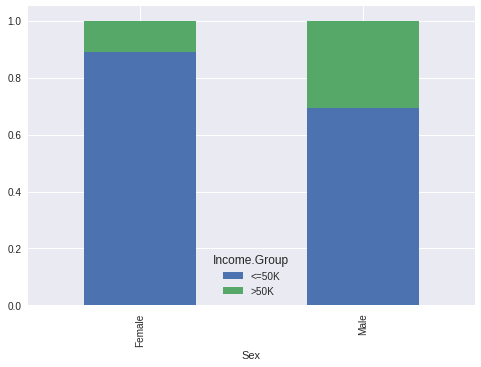

In [58]:
#Multivariate analyse of 'Sex' and 'Income Group'

cross_tab = pd.crosstab(df['Sex'], df['Income.Group'],margins=True)
print(cross_tab)
#convert absolute number to percentage
def convertPercentage(data):
    return data/float(data[-1])

temp_cross_tab = cross_tab.apply(convertPercentage, axis=1)
temp_cross_tab.iloc[:-1,:-1].plot(kind='bar', stacked=True)
plt.show()


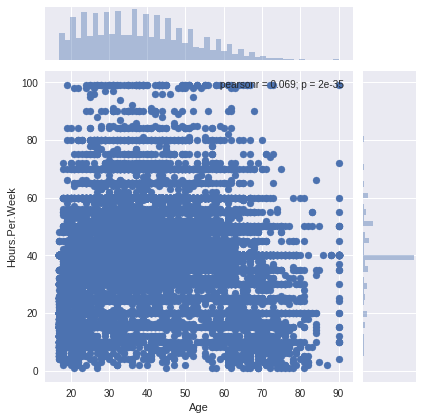

In [59]:
#Multivariate analyse of 'Age' and 'Hours-Per-Week'
sns.jointplot(x='Age',y='Hours.Per.Week' ,data=df)
plt.show()

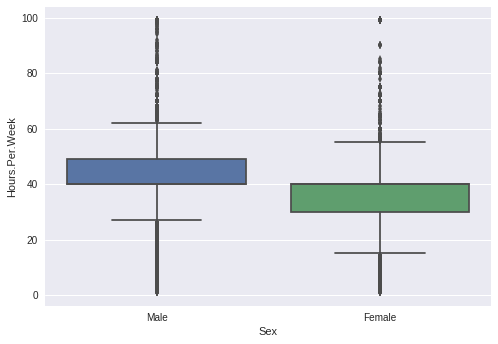

In [60]:
#Multivariate analyse of 'Sex' and 'Hours-Per-Week'
sns.boxplot(x='Sex', y='Hours.Per.Week' ,data=df)
plt.show()

In [62]:
# Treating missing values

print(df.isnull().sum())

empty_var_list = ['Workclass','Occupation','Native.Country']
for var in empty_var_list:
    df[var].fillna(mode(df[var].astype(str)).mode[0], inplace=True)

print(df.isnull().sum())

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64


/home/varun/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64


In [64]:
# Variable transformation
"""Combine the categories of categorical variables where the frequency of a value in less than 5%"""

categorical_vars = list(df.dtypes.loc[df.dtypes == 'object'].index)
print(categorical_vars)

print(df[categorical_vars].nunique())
#Determine the categories to combine
for var in categorical_vars:
    freq = df[var].value_counts()/df.shape[0]
    catgrs_to_combine = freq.loc[freq.values < 0.05].index

    # Combine the categories

    for catgr in catgrs_to_combine:
        df[var].replace({catgr:'other'}, inplace=True)

print(df[categorical_vars].nunique())

# Encode the categorical variables

le = LabelEncoder()
for var in categorical_vars:
    df[var] = le.fit_transform(df[var])
df.describe()

['Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group']
Workclass          8
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64
Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64


,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.222290,2.044900,1.342680,3.780719,1.196984,0.953840,0.669205,40.437456,0.086238,0.240810
std,9399.695394,13.640433,0.714131,1.465307,0.805738,2.388537,1.284506,0.378946,0.470506,12.347429,0.280720,0.427581
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8141.000000,28.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,40.000000,0.000000,0.000000
50%,16281.000000,37.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,40.000000,0.000000,0.000000
75%,24421.000000,48.000000,1.000000,3.000000,2.000000,6.000000,2.000000,1.000000,1.000000,45.000000,0.000000,0.000000
max,32561.000000,90.000000,3.000000,4.000000,3.000000,7.000000,4.000000,2.000000,1.000000,99.000000,1.000000,1.000000


In [65]:
# Create predictive models

target_var = 'Income.Group'
features = [fea for fea in df.columns if fea not in ['ID',target_var]]
print(features)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


In [66]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)
# Perform 5-fold CV
cvscores_knn = cross_val_score(knn, df[features], df[target_var], cv = 5)
print(np.mean(cvscores_knn))

0.789441396926


In [68]:
#initialise decision tree algorithm
dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, max_features='sqrt')
# Perform 5-fold CV
cvscores_dtc = cross_val_score(dtc, df[features], df[target_var], cv = 5)
print(np.mean(cvscores_dtc))

0.808421358945


In [69]:
# Optimise decision tree by tuning hyperparameters
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}


# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(df[features], df[target_var])

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 8}
Best score is 0.8143484536715703
